# Importando Bibliotecas

In [ ]:
# Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Metricas e ferramentas de processamento do SKLEARN

from sklearn import metrics  # Métricas adicionais para avaliação de modelos
from sklearn.model_selection import train_test_split, KFold  # Funções para dividir dados em conjuntos de treino e teste, e para validação cruzada
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métricas de avaliação de modelos de classificação
from sklearn.preprocessing import StandardScaler  # Ferramenta para pré-processamento de dados (escalonamento)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score  # Métricas de avaliação de modelos de classificação


# Técnicas de apredizado de máquina

from sklearn.linear_model import LinearRegression  # Implementação de regressão linear
from sklearn.naive_bayes import GaussianNB  # Implementação do algoritmo Naive Bayes Gaussiano
from sklearn import tree  # Implementação de árvores de decisão
from sklearn.ensemble import RandomForestClassifier  # Implementação de classificador de floresta aleatória
from sklearn.svm import SVC  # Implementação do algoritmo SVM (Support Vector Machine)
from sklearn.neighbors import KNeighborsClassifier # Implementação do algoritmo KNN
from sklearn.linear_model import LogisticRegression
# Bivlioteca TensorFlow

from tensorflow.keras.models import Sequential  # Modelo de rede neural sequencial do Keras
from tensorflow.keras.layers import *  # Camadas de uma rede neural no Keras
from tensorflow.keras.callbacks import ModelCheckpoint  # Callback para salvar o modelo durante o treinamento
from tensorflow.keras.losses import MeanSquaredError  # Função de perda para regressão no Keras
from tensorflow.keras.metrics import RootMeanSquaredError  # Métrica adicional para avaliação de modelos de regressão
from tensorflow.keras.optimizers import Adam  # Otimizador Adam para treinamento de redes neurais no Keras


In [ ]:
# Importando Base de Dados Fridge
weather = pd.read_csv('/content/Train_Test_IoT_Weather.csv')

In [ ]:
# Definindo método de normalização de variáveis Max_Min
def max_min(x):
  return (x- x.min())/(x.max() - x.min())

In [ ]:
# Mapeamento das variáveis nominais para numéricas
mapeamento = {'normal':0, 'backdoor':1, 'injection':2, 'password':3, 'ransomware':4, 'xss':5, 'default': 0, 'scanning': 6, 'ddos': 7}

# Pré-processamento

Visão geral do Banco de dados

In [ ]:
weather.head()

,ts,date,time,temperature,pressure,humidity,label,type
0,1556238796,25-Apr-19,17:33:16,40.881866,-0.101806,38.363631,1,ddos
1,1556238796,25-Apr-19,17:33:16,44.913806,2.661616,46.141423,1,ddos
2,1556238796,25-Apr-19,17:33:16,38.295822,-2.438871,50.850643,1,ddos
3,1556238801,25-Apr-19,17:33:21,41.306586,-0.101806,38.363631,1,ddos
4,1556238801,25-Apr-19,17:33:21,44.903178,3.080849,46.141423,1,ddos


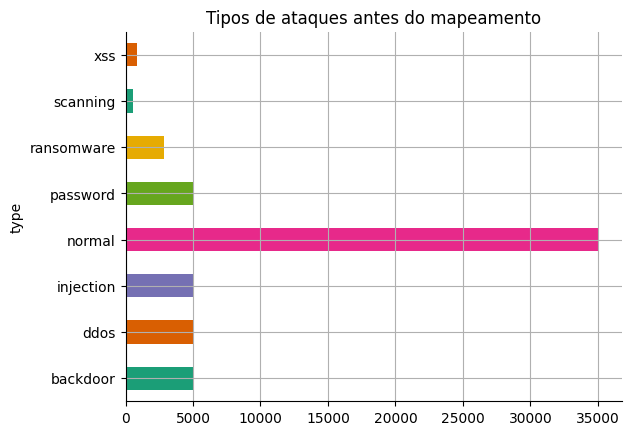

In [ ]:
weather.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Tipos de ataques antes do mapeamento")
plt.grid()

In [ ]:
weather = weather.replace(mapeamento)# mapeia as variáveis nominais

Normatizando o banco de dados

In [ ]:
weather['temperature'] = weather['temperature'].transform(max_min)
weather['pressure'] = weather['pressure'].transform(max_min)
weather['humidity'] = weather['humidity'].transform(max_min)

In [ ]:
weather['ts'] = weather['ts'].transform(max_min)

In [ ]:
# colunas = [0]*len(thermostat['type'])
# for i in range (len(thermostat['type'])):
#      colunas[i] = i
# thermostat['coluns'] = colunas

In [ ]:
#  thermostat['coluns'] = thermostat['coluns'].transform(max_min)

In [ ]:
weather.head()

,ts,date,time,temperature,pressure,humidity,label,type
0,0.898364,25-Apr-19,17:33:16,0.690627,0.487256,0.382388,1,7
1,0.898364,25-Apr-19,17:33:16,0.827429,0.599805,0.460480,1,7
2,0.898364,25-Apr-19,17:33:16,0.602885,0.392072,0.507763,1,7
3,0.898366,25-Apr-19,17:33:21,0.705038,0.487256,0.382388,1,7
4,0.898366,25-Apr-19,17:33:21,0.827068,0.616880,0.460480,1,7


Definindo treinamento e teste

In [ ]:
# Atributos
atributos = weather[['ts', 'temperature', 'pressure', 'humidity']]
classe = weather['type']

In [ ]:
# Visualizando Atributos
atributos.head()

,ts,temperature,pressure,humidity
0,0.898364,0.690627,0.487256,0.382388
1,0.898364,0.827429,0.599805,0.460480
2,0.898364,0.602885,0.392072,0.507763
3,0.898366,0.705038,0.487256,0.382388
4,0.898366,0.827068,0.616880,0.460480


In [ ]:
# Separando dados de Treino e Teste em proporção 80% 20%, com random_state = 42
X_train, X_test, y_train, y_test = train_test_split(atributos, classe, test_size=0.2, random_state=42)

# 1º técnica - Arvore de decisão

In [ ]:
#definindo um classificador Arvore de decisão
clf_AV = tree.DecisionTreeClassifier()

#Validação cruzada usando KFold com 4 folds
kf = KFold(n_splits=4, shuffle=True, random_state=42)

#Acurácia média durante a validação cruzada
acuracias_cruzadas = cross_val_score(clf_AV, X_train, y_train, cv=kf, scoring='accuracy')
print('Acurácia média durante a validação cruzada: {}'.format(round(acuracias_cruzadas.mean(), 4)))

#Modelo com dados de treinamento
clf_AV = clf_AV.fit(X_train, y_train)

Acurácia média durante a validação cruzada: 1.0


In [ ]:
#Predição e Acurácia de Teste
predicao_1 = clf_AV.predict(X_test)
acuracia_1 = accuracy_score(y_test, predicao_1)
print('Acurácia da classificação: {}' . format(round(acuracia_1,4)))

Acurácia da classificação: 1.0


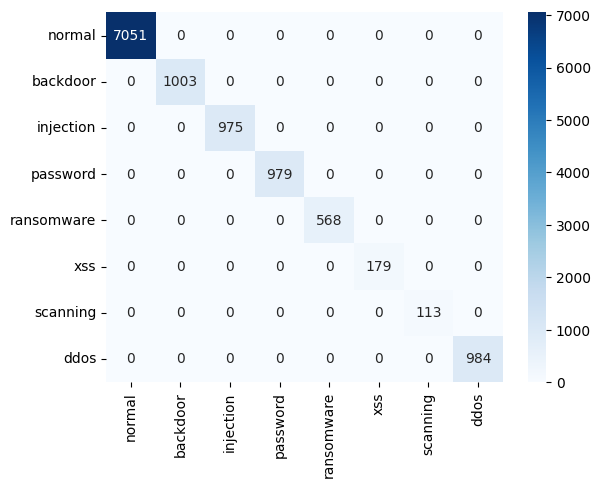

In [ ]:
#Matriz de confusão
class_labels = ['normal', 'backdoor', 'injection', 'password', 'ransomware', 'xss', 'scanning', 'ddos']

sns.heatmap(confusion_matrix(y_test, predicao_1), annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

In [ ]:
print(classification_report(y_test, predicao_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7051
           1       1.00      1.00      1.00      1003
           2       1.00      1.00      1.00       975
           3       1.00      1.00      1.00       979
           4       1.00      1.00      1.00       568
           5       1.00      1.00      1.00       179
           6       1.00      1.00      1.00       113
           7       1.00      1.00      1.00       984

    accuracy                           1.00     11852
   macro avg       1.00      1.00      1.00     11852
weighted avg       1.00      1.00      1.00     11852



# 2º técnica - KNN

In [ ]:
#definindo um classificador KNN
clf_KNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)

#Validação cruzada usando KFold com 4 folds
kf = KFold(n_splits=4, shuffle=True, random_state=42)

#Acurácia média durante a validação cruzada
acuracias_cruzadas = cross_val_score(clf_KNN, X_train, y_train, cv=kf, scoring='accuracy')
print('Acurácia média durante a validação cruzada: {}'.format(round(acuracias_cruzadas.mean(), 4)))

#Modelo com dados de treinamento
clf_KNN = clf_KNN.fit(X_train, y_train)

Acurácia média durante a validação cruzada: 0.9967


In [ ]:
#Predição e Acurácia de Teste
predicao_2 = clf_KNN.predict(X_test)
acuracia_2 = accuracy_score(y_test, predicao_2)
print('Acurácia da classificação: {}' . format(round(acuracia_2, 4)))

Acurácia da classificação: 0.9983


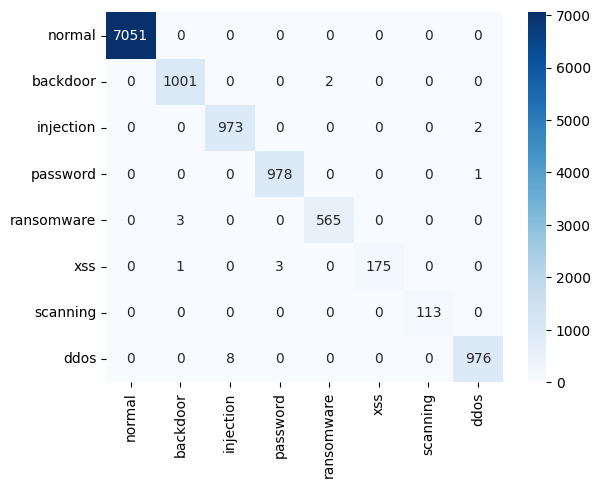

In [ ]:
# Matriz de confusão
class_labels = ['normal', 'backdoor', 'injection', 'password', 'ransomware', 'xss', 'scanning', 'ddos']

sns.heatmap(confusion_matrix(y_test, predicao_2), annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

In [ ]:
print(classification_report(y_test, predicao_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7051
           1       1.00      1.00      1.00      1003
           2       0.99      1.00      0.99       975
           3       1.00      1.00      1.00       979
           4       1.00      0.99      1.00       568
           5       1.00      0.98      0.99       179
           6       1.00      1.00      1.00       113
           7       1.00      0.99      0.99       984

    accuracy                           1.00     11852
   macro avg       1.00      0.99      1.00     11852
weighted avg       1.00      1.00      1.00     11852



# 3º técnica - SVM

In [ ]:
#definindo um classificador SVM
SVM_rbf = SVC(kernel = 'rbf', gamma = 'auto', C = 1.0 )

#Validação cruzada usando KFold com 4 folds
kf = KFold(n_splits=4, shuffle=True, random_state=42)

#Acurácia média durante a validação cruzada
acuracias_cruzadas = cross_val_score(SVM_rbf, X_train, y_train, cv=kf, scoring='accuracy')
print('Acurácia média durante a validação cruzada: {}'.format(round(acuracias_cruzadas.mean(), 4)))

#Modelo com dados de treinamento
SVM_rbf.fit(X_train, y_train)

Acurácia média durante a validação cruzada: 0.934


SVC(gamma='auto')

In [ ]:
#Predição e Acurácia de Teste
predicao_3 = SVM_rbf.predict(X_test)
acuracia_3 = accuracy_score(y_test, predicao_3)
print('Acurácia da classificação: {}' . format(round(acuracia_3,4)))

Acurácia da classificação: 0.9427


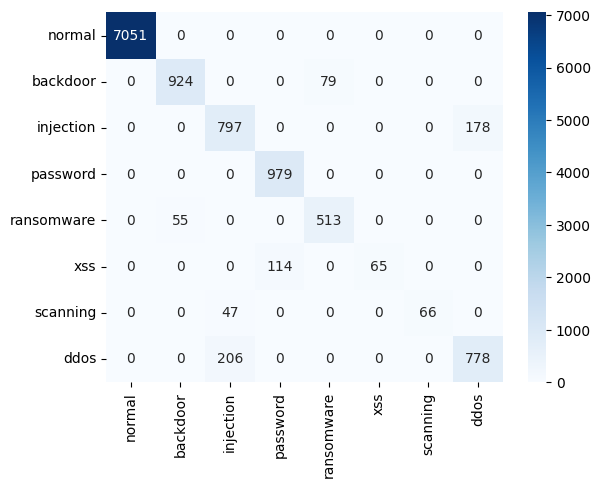

In [ ]:
#Matriz de confusão
class_labels = ['normal', 'backdoor', 'injection', 'password', 'ransomware', 'xss', 'scanning', 'ddos']

sns.heatmap(confusion_matrix(y_test, predicao_3), annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

In [ ]:
print(classification_report(y_test, predicao_3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7051
           1       0.94      0.92      0.93      1003
           2       0.76      0.82      0.79       975
           3       0.90      1.00      0.94       979
           4       0.87      0.90      0.88       568
           5       1.00      0.36      0.53       179
           6       1.00      0.58      0.74       113
           7       0.81      0.79      0.80       984

    accuracy                           0.94     11852
   macro avg       0.91      0.80      0.83     11852
weighted avg       0.94      0.94      0.94     11852



#4º Regressão Logistica

In [ ]:
#definindo um classificador Arvore de decisão
LR = LogisticRegression(solver='lbfgs', max_iter=1000)

#Validação cruzada usando KFold com 4 folds
kf = KFold(n_splits=4, shuffle=True, random_state=42)

#Acurácia média durante a validação cruzada
acuracias_cruzadas = cross_val_score(LR, X_train, y_train, cv=kf, scoring='accuracy')
print('Acurácia média durante a validação cruzada: {}'.format(round(acuracias_cruzadas.mean(), 4)))

#Modelo com dados de treinamento
LR = LR.fit(X_train, y_train)

Acurácia média durante a validação cruzada: 0.8514


In [ ]:
#Predição e Acurácia de Teste
predicao_4 = LR.predict(X_test)
acuracia_4 = accuracy_score(y_test, predicao_4)
print('Acurácia da classificação: {}' . format(round(acuracia_4,4)))

Acurácia da classificação: 0.8562


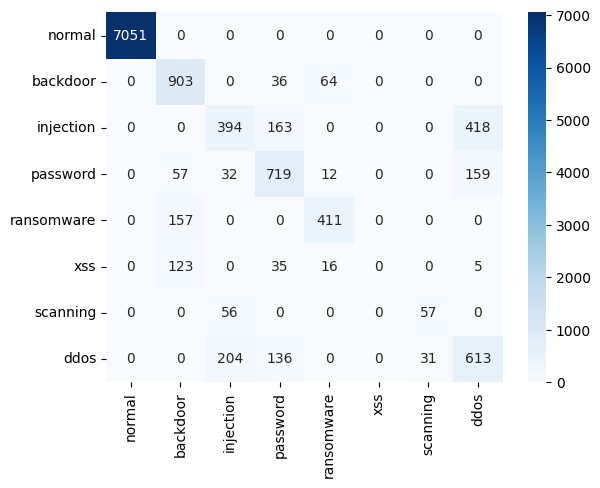

In [ ]:
# Matriz de confusão
class_labels = ['normal', 'backdoor', 'injection', 'password', 'ransomware', 'xss', 'scanning', 'ddos']

sns.heatmap(confusion_matrix(y_test, predicao_4), annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

In [ ]:
print(classification_report(y_test, predicao_4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7051
           1       0.73      0.90      0.81      1003
           2       0.57      0.40      0.47       975
           3       0.66      0.73      0.70       979
           4       0.82      0.72      0.77       568
           5       0.00      0.00      0.00       179
           6       0.65      0.50      0.57       113
           7       0.51      0.62      0.56       984

    accuracy                           0.86     11852
   macro avg       0.62      0.61      0.61     11852
weighted avg       0.85      0.86      0.85     11852



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 5º Técnica - Regressão linear

In [ ]:
#Definindo um classificador de regreção linear
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
# Predição e criação de variável auxiliar
predicao_4 = reg.predict(X_test)
aux = np.zeros(len(X_test))

# Aproximando a predição para o inteiro mais próximo e armazenando na variável auxiliar
for i in range(len(X_test)):
    aux[i] = round(predicao_4[i], 0)

# Acurácia de Teste
acuracia_5 = accuracy_score(y_test, aux[:].astype(int))
print('Acurácia da classificação: {}'.format(round(acuracia_5, 3)))


Acurácia da classificação: 0.706


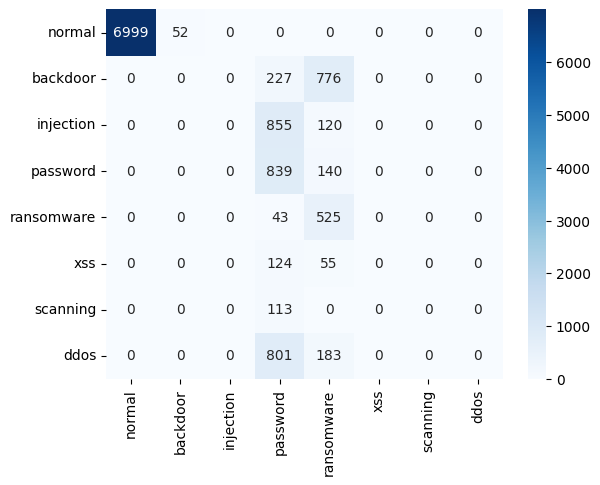

In [ ]:
#Matriz de confusão
class_labels = ['normal', 'backdoor', 'injection', 'password', 'ransomware', 'xss', 'scanning', 'ddos']

sns.heatmap(confusion_matrix(y_test, aux), annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

In [ ]:
print(classification_report(y_test, aux))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7051
           1       0.00      0.00      0.00      1003
           2       0.00      0.00      0.00       975
           3       0.28      0.86      0.42       979
           4       0.29      0.92      0.44       568
           5       0.00      0.00      0.00       179
           6       0.00      0.00      0.00       113
           7       0.00      0.00      0.00       984

    accuracy                           0.71     11852
   macro avg       0.20      0.35      0.23     11852
weighted avg       0.63      0.71      0.65     11852



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 6º Técnica - Naïve Bayes (NB)

In [ ]:
#definindo um classificador NB
NB = GaussianNB()

#Validação cruzada usando KFold com 4 folds
kf = KFold(n_splits=4, shuffle=True, random_state=42)

#Acurácia média durante a validação cruzada
acuracias_cruzadas = cross_val_score(NB, X_train, y_train, cv=kf, scoring='accuracy')
print('Acurácia média durante a validação cruzada: {}'.format(round(acuracias_cruzadas.mean(), 4)))

#Modelo com dados de treinamento
NB.fit(X_train, y_train)

Acurácia média durante a validação cruzada: 1.0


GaussianNB()

In [ ]:
#Predição e Acurácia de Teste
predicao_6 = NB.predict(X_test)
acuracia_6 = accuracy_score(y_test, predicao_6)
print('Acurácia da classificação: {}' . format(round(acuracia_6,4)))

Acurácia da classificação: 1.0


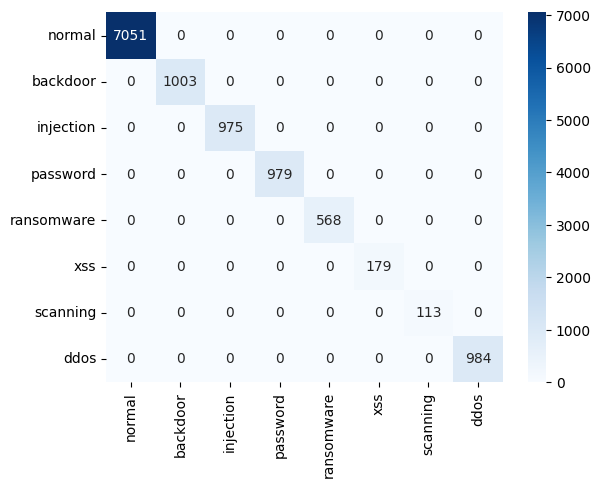

In [ ]:
#Matriz de confusão
class_labels = ['normal', 'backdoor', 'injection', 'password', 'ransomware', 'xss', 'scanning', 'ddos']

sns.heatmap(confusion_matrix(y_test, predicao_6), annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

In [ ]:
print(classification_report(y_test, predicao_6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7051
           1       1.00      1.00      1.00      1003
           2       1.00      1.00      1.00       975
           3       1.00      1.00      1.00       979
           4       1.00      1.00      1.00       568
           5       1.00      1.00      1.00       179
           6       1.00      1.00      1.00       113
           7       1.00      1.00      1.00       984

    accuracy                           1.00     11852
   macro avg       1.00      1.00      1.00     11852
weighted avg       1.00      1.00      1.00     11852



# 6º Técnica - Random Forest

In [ ]:
#definindo um classificador NB
RF = RandomForestClassifier()

#Validação cruzada usando KFold com 4 folds
kf = KFold(n_splits=4, shuffle=True, random_state=42)

#Acurácia média durante a validação cruzada
acuracias_cruzadas = cross_val_score(NB, X_train, y_train, cv=kf, scoring='accuracy')
print('Acurácia média durante a validação cruzada: {}'.format(round(acuracias_cruzadas.mean(), 4)))

#Modelo com dados de treinamento
RF.fit(X_train,y_train)

Acurácia média durante a validação cruzada: 1.0


RandomForestClassifier()

In [ ]:
#Predição e Acurácia de Teste
predicao_7 = RF.predict(X_test)
acuracia_7 = accuracy_score(y_test, predicao_7)
print('Acurácia da classificação: {}' . format(round(acuracia_7,4)))

Acurácia da classificação: 1.0


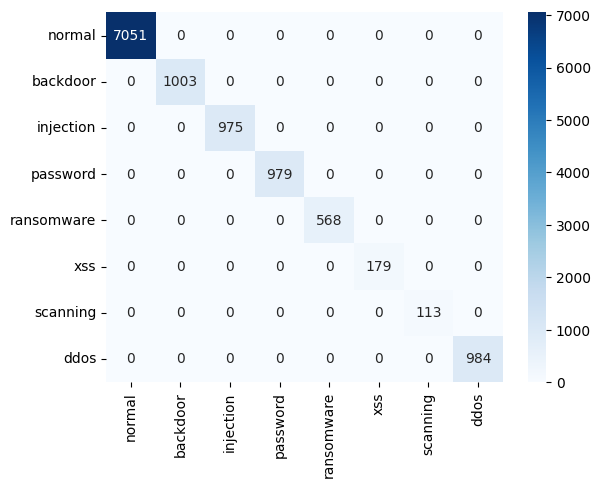

In [ ]:
#Matriz de confusão
class_labels = ['normal', 'backdoor', 'injection', 'password', 'ransomware', 'xss', 'scanning', 'ddos']

sns.heatmap(confusion_matrix(y_test, predicao_7), annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

In [ ]:
print(classification_report(y_test, predicao_7))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7051
           1       1.00      1.00      1.00      1003
           2       1.00      1.00      1.00       975
           3       1.00      1.00      1.00       979
           4       1.00      1.00      1.00       568
           5       1.00      1.00      1.00       179
           6       1.00      1.00      1.00       113
           7       1.00      1.00      1.00       984

    accuracy                           1.00     11852
   macro avg       1.00      1.00      1.00     11852
weighted avg       1.00      1.00      1.00     11852



## LSTM

In [ ]:
atributos

,ts,temperature,pressure,humidity
0,0.898364,0.690627,0.487256,0.382388
1,0.898364,0.827429,0.599805,0.460480
2,0.898364,0.602885,0.392072,0.507763
3,0.898366,0.705038,0.487256,0.382388
4,0.898366,0.827068,0.616880,0.460480
...,...,...,...,...
59255,0.043564,0.416396,0.581205,0.368946
59256,0.043564,0.302880,0.408702,0.903832
59257,0.043564,0.904522,0.526956,0.375601
59258,0.043566,0.765787,0.620438,0.937468


In [ ]:
# Definindo um modelador de dados para a entrada da rede LSTM
def df_to_X_y2(df, window_size = 5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)- window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
# Modelando os dados com janela tamanho 5
WINDOW_SIZE = 5
X1, y1 = df_to_X_y2(atributos, WINDOW_SIZE)

In [ ]:
X1.shape


(59255, 5, 4)

In [ ]:
labels_2 = classe[5:]

In [ ]:
labels_2.shape

(59255,)

In [ ]:
# Dividindo dados de treino e teste na proporção 80% e 20%
X_train, X_test, y_train, y_test = train_test_split(X1, labels_2, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(47404, 5, 4)

In [ ]:
model1 = Sequential()
model1.add(InputLayer(input_shape=(5,4)))  # Adicione input_shape para representar timesteps e features
model1.add(LSTM(64))
model1.add(Dense(128, activation='tanh'))
model1.add(Dropout(0.2))
model1.add(Dense(100, activation='tanh'))
model1.add(Dropout(0.2))
model1.add(Dense(64, activation='tanh'))
model1.add(Dropout(0.2))
model1.add(Dense(8, activation='sigmoid'))

model1.build(input_shape=(None, 1, 2))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17664     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               12900     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss = 'sparse_categorical_crossentropy' , optimizer = Adam(learning_rate=0.0001), metrics = ['sparse_categorical_accuracy'])

In [ ]:
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, callbacks=[cp1])

Epoch 1/40
1482/1482 [==============================] - 12s 7ms/step - loss: 0.6705 - sparse_categorical_accuracy: 0.7465 - val_loss: 0.3982 - val_sparse_categorical_accuracy: 0.8676
Epoch 2/40
1482/1482 [==============================] - 9s 6ms/step - loss: 0.2987 - sparse_categorical_accuracy: 0.8910 - val_loss: 0.2030 - val_sparse_categorical_accuracy: 0.9294
Epoch 3/40
1482/1482 [==============================] - 10s 6ms/step - loss: 0.1918 - sparse_categorical_accuracy: 0.9298 - val_loss: 0.1531 - val_sparse_categorical_accuracy: 0.9486
Epoch 4/40
1482/1482 [==============================] - 10s 7ms/step - loss: 0.1372 - sparse_categorical_accuracy: 0.9518 - val_loss: 0.0931 - val_sparse_categorical_accuracy: 0.9692
Epoch 5/40
1482/1482 [==============================] - 10s 7ms/step - loss: 0.0988 - sparse_categorical_accuracy: 0.9686 - val_loss: 0.0627 - val_sparse_categorical_accuracy: 0.9828
Epoch 6/40
1482/1482 [==============================] - 10s 7ms/step - loss: 0.0767 - 

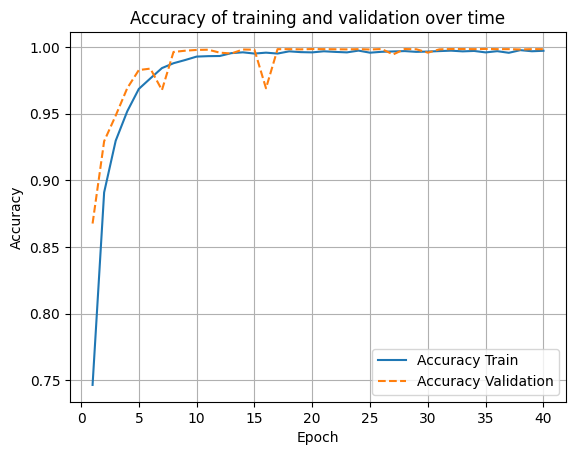

In [ ]:
# Obtendo a acurácia do histórico
accuracy = history.history['sparse_categorical_accuracy']
val_accuracy = history.history['val_sparse_categorical_accuracy']

# Obtendo as épocas
epochs = range(1, len(accuracy) + 1)

# Plotando a acurácia
plt.plot(epochs, accuracy, '-', label='Accuracy Train')
plt.plot(epochs, val_accuracy, '--', label='Accuracy Validation')
plt.title('Accuracy of training and validation over time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
test_loss, test_accuracy = model1.evaluate(X_test, y_test)

371/371 [==============================] - 1s 2ms/step - loss: 0.0096 - sparse_categorical_accuracy: 0.9985


In [ ]:
# Obtém as previsões do modelo para os dados de teste
y_pred = model1.predict(X_test)

# Converte as previsões para rótulos binários (0 ou 1) para cada classe individualmente
y_pred_binary = np.argmax(y_pred, axis=1)

# Calcula o recall para cada classe individualmente
recall_per_class = recall_score(y_test, y_pred_binary, average=None)

# Calcula a precisão para cada classe individualmente
precision_per_class = precision_score(y_test, y_pred_binary, average=None)

# Calcula o F-score para cada classe individualmente
f_score_per_class = f1_score(y_test, y_pred_binary, average=None)

# Calcula a média ponderada dos recalls
weighted_recall = recall_score(y_test, y_pred_binary, average='weighted')

# Calcula a média ponderada da precisão
weighted_precision = precision_score(y_test, y_pred_binary, average='weighted')

# Calcula a média ponderada do F-score
weighted_f_score = f1_score(y_test, y_pred_binary, average='weighted')

# Imprime a Accuracy
print("Accuracy: {:.4f}".format(test_accuracy))

# Imprime a média ponderada da precisão
print("Weighted Precision: {:.4f}".format(weighted_precision))

# Imprime a média ponderada do F-score
print("Weighted F-score: {:.4f}".format(weighted_f_score))

# Imprime a média ponderada dos recalls
print("Weighted Recall: {:.4f}".format(weighted_recall))

371/371 [==============================] - 1s 2ms/step
Accuracy: 0.9985
Weighted Precision: 0.9985
Weighted F-score: 0.9985
Weighted Recall: 0.9985
